In [1]:
# Load csv with the validation results per epoch

import pandas as pd
import matplotlib.pyplot as plt
import sys



In [2]:
path = r'c:\Users\jalvarez\Documents\Data\newruns\runs\new_encoder_no_linearResCon\General_Contacts\average_validation.csv'

df = pd.read_csv(path)

df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\jalvarez\\Documents\\Data\\newruns\\runs\\new_encoder_no_linearResCon\\General_Contacts\\average_validation.csv'

In [20]:
# Drop the lines 161, 162, 163, 164, 165 and 166
df = df.drop(df.index[161:167])

In [ ]:
df.iloc[150:170, :]

In [21]:
# Keep only each 10 epochs
df = df.iloc[::10, :]
df


,Wall time,Step,Value
0,1.728048e+09,0,0.770581
10,1.728051e+09,10,0.806538
20,1.728054e+09,20,0.815468
30,1.728058e+09,30,0.825214
40,1.728061e+09,40,0.828397
50,1.728064e+09,50,0.823199
60,1.728067e+09,60,0.835329
70,1.728070e+09,70,0.837939
80,1.728073e+09,80,0.836905
90,1.728077e+09,90,0.828133


In [22]:
df.drop(columns=['Wall time'], inplace=True)


In [23]:
max = df['Value'].max()
print(max)
argmax = df['Value'].argmax()
print(df.iloc[argmax])

0.8584352135658264
Step     290.000000
Value      0.858435
Name: 296, dtype: float64


In [24]:
min = df['Value'].min()

C:\Users\jalvarez\AppData\Local\Temp\ipykernel_4340\1870879057.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(df.iloc[argmax]['Step'], df.iloc[argmax]['Value'], 'ro', label='Max Value', color='red', markersize=10)


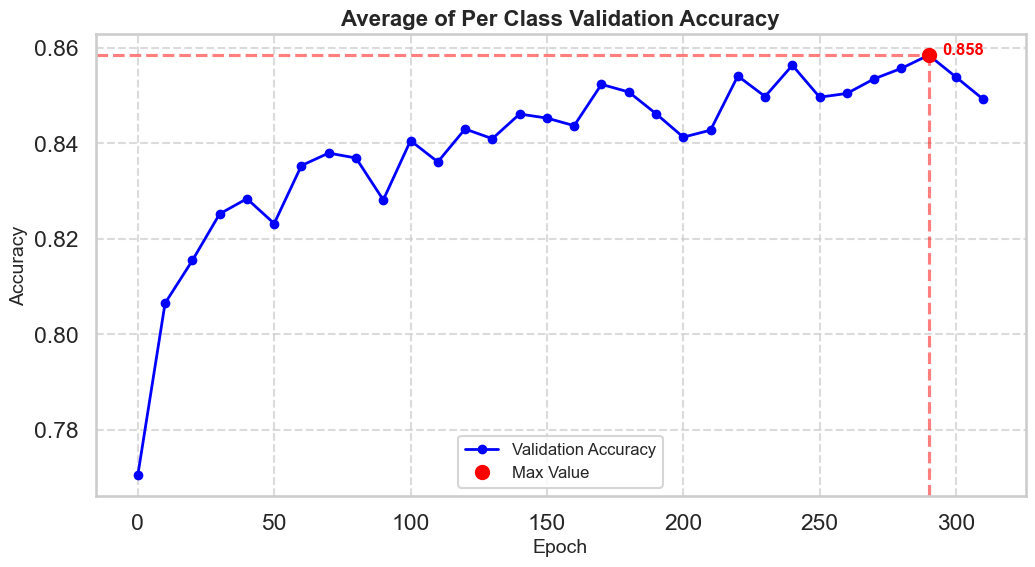

In [50]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(epoch, value, label='Validation Accuracy', color='blue', marker='o', linestyle='-', linewidth=2, markersize=6)

# Plot the max value
plt.plot(df.iloc[argmax]['Step'], df.iloc[argmax]['Value'], 'ro', label='Max Value', color='red', markersize=10)

# Trace the lines to the max value
plt.axhline(y=max, xmax=0.90, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=df.iloc[argmax]['Step'], ymax=0.955, color='red', linestyle='--', alpha=0.5)

# Add the max value
plt.text(df.iloc[argmax]['Step'] + 5, max, f'{max:.3f}', color='red', fontsize=12, fontweight='bold')

# Add grid, title, and labels
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.title('Average of Per Class Validation Accuracy', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Show the plot
plt.show()


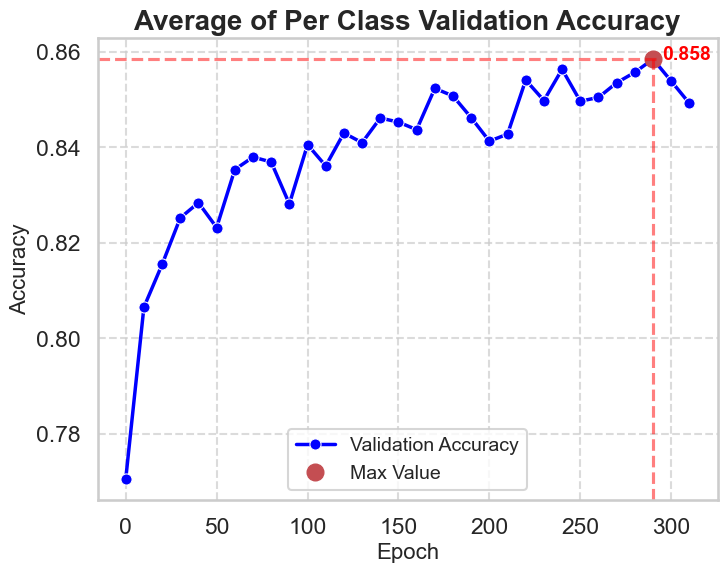

In [61]:
import seaborn as sns

# Set the style and context for the plot
sns.set_theme(style="whitegrid", context="talk")

# Create the plot
plt.figure(figsize=(8, 6))
sns.lineplot(x=epoch, y=value, label='Validation Accuracy', color='blue', marker='o', linewidth=2.5, markersize=8)

# Plot the max value
plt.plot(df.iloc[argmax]['Step'], df.iloc[argmax]['Value'], 'ro', label='Max Value', markersize=12)

# Trace the lines to the max value
plt.axhline(y=max, xmax=0.90, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=df.iloc[argmax]['Step'], ymax=0.955, color='red', linestyle='--', alpha=0.5)

# Add the max value
plt.text(df.iloc[argmax]['Step'] + 5, max, f'{max:.3f}', color='red', fontsize=14, fontweight='bold')

# Add grid, title, and labels
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=14)
plt.title('Average of Per Class Validation Accuracy', fontsize=20, fontweight='bold')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)

# Show the plot
plt.show()


In [63]:
import joblib

In [64]:
# load model
model = joblib.load('baseline_models/new_dataset/model_sniffR.pkl')

In [78]:
model.learning_rate_init

0.001

In [72]:
num_coef = 0
for layer in model.coefs_:
    num_coef += layer.size
        

num_coef

20900

# Number of events

In [1]:
import pandas as pd

In [16]:
path = r'c:\Users\jalvarez\Documents\Data\LargeDataset\DMD_mal_Test_19.csv'

df = pd.read_csv(path)
df.head(n = 10)

,Frames,General_Contacts,Sniffing_R,Sniffing_head_R,Sniffing_other_R,Sniffing_anal_R,Poursuit_R,Dominance_R,Rearing_R,Grooming_R,Sniffing_V,Sniffing_head_V,Sniffing_other_V,Sniffing_anal_V,Poursuit_V,Dominance_V,Rearing_V,Grooming_V
0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Take only 'General_Contacts'
df = df['General_Contacts']

In [12]:
coun_new_event = 0
lat = 0
lat_indx = 0
for i in range(len(df) - 1):
    if df[i] == 1 and lat_indx == 0:
        lat = i
        lat_indx = 1
    if df[i] == 0 and df[i+1] == 1:
        coun_new_event += 1

In [13]:
coun_new_event

46

In [17]:
print('Number of new events:', coun_new_event)
print('Latency:', lat/15)

Number of new events: 46
Latency: 0.3333333333333333


# Analysis MDX52 INèS

In [39]:
import os
import numpy as np
import pandas as pd

In [40]:
folder_gt_path = r'c:\Users\jalvarez\Documents\Data\DataSet_MDX52_INES\GT'
folder_pred_path = r'c:\Users\jalvarez\Documents\Data\DataSet_MDX52_INES\outputs_GATs'

In [41]:
# Load the GT

files_gt = os.listdir(folder_gt_path)
files_gt = sorted(files_gt)
files_gt

['Test_1.csv',
 'Test_10.csv',
 'Test_11.csv',
 'Test_12.csv',
 'Test_13.csv',
 'Test_14.csv',
 'Test_15.csv',
 'Test_16.csv',
 'Test_2.csv',
 'Test_3.csv',
 'Test_4.csv',
 'Test_5.csv',
 'Test_6.csv',
 'Test_7.csv',
 'Test_8.csv',
 'Test_9.csv']

In [42]:

files_pred = os.listdir(folder_pred_path)
# Only the files with the extension .csv
files_pred = [file for file in files_pred if file.endswith('output.csv')]
files_pred = sorted(files_pred)
files_pred


['Test_10_output.csv',
 'Test_11_output.csv',
 'Test_12_output.csv',
 'Test_13_output.csv',
 'Test_14_output.csv',
 'Test_15_output.csv',
 'Test_16_output.csv',
 'Test_1_output.csv',
 'Test_2_output.csv',
 'Test_3_output.csv',
 'Test_4_output.csv',
 'Test_5_output.csv',
 'Test_6_output.csv',
 'Test_7_output.csv',
 'Test_8_output.csv',
 'Test_9_output.csv']

In [43]:
# charge first file
path_gt = os.path.join(folder_gt_path, files_gt[0])
path_pred = os.path.join(folder_pred_path, files_pred[0])

df_gt = pd.read_csv(path_gt)
df_pred = pd.read_csv(path_pred)


In [44]:
df_gt

,Frame,General_Contacts,Sniffing_R,Sniffing_head_R,Sniffing_body_R,Sniffing_anogenital_R,Following_R,Dominance_R,Rearing_R,Grooming_R,Sniffing_V,Sniffing_head_V,Sniffing_body_V,Sniffing_anogenital_V,Rearing_V,Grooming_V,Following_V,Dominance_V
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5402,5402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5403,5403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5404,5404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5405,5405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
df_pred

,Frame,General_Contacts,Sniffing_R,Sniffing_V,Following_R,Following_V,Dominance_R,Dominance_V,Grooming_R,Grooming_V
0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5397,5399.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5398,5400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5399,5401.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5400,5402.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
gt_df = pd.DataFrame()
pred_df = pd.DataFrame()

for file in files_gt:
    print(file)
    df_gt = pd.read_csv(os.path.join(folder_gt_path, file))
    # Discard the first 2 frames and last 2 frames
    df_gt = df_gt.iloc[2:-2, :]
    gt_df = pd.concat([gt_df, df_gt])

    for file_pred in files_pred:

        if file.split('.')[0] == file_pred.split('_')[0] + '_' + file_pred.split('_')[1]:
            print(file_pred.split('_')[0] + '_' + file_pred.split('_')[1])
            df_pred = pd.read_csv(os.path.join(folder_pred_path, file_pred))
            # Discard the first 2 frames and last 2 frames
            # check if the length is the same
            if len(df_gt) != len(df_pred):
                print(f'Length of {file} is different from {file_pred}')
                break
            pred_df = pd.concat([pred_df, df_pred])
            


Test_1.csv
Test_1
Test_10.csv
Test_10
Test_11.csv
Test_11
Test_12.csv
Test_12
Test_13.csv
Test_13
Test_14.csv
Test_14
Test_15.csv
Test_15
Test_16.csv
Test_16
Test_2.csv
Test_2
Test_3.csv
Test_3
Test_4.csv
Test_4
Test_5.csv
Test_5
Test_6.csv
Test_6
Test_7.csv
Test_7
Test_8.csv
Test_8
Test_9.csv
Test_9


In [47]:
# Restore index
gt_df.reset_index(drop=True, inplace=True)
pred_df.reset_index(drop=True, inplace=True)

In [48]:
gt_df

,Frame,General_Contacts,Sniffing_R,Sniffing_head_R,Sniffing_body_R,Sniffing_anogenital_R,Following_R,Dominance_R,Rearing_R,Grooming_R,Sniffing_V,Sniffing_head_V,Sniffing_body_V,Sniffing_anogenital_V,Rearing_V,Grooming_V,Following_V,Dominance_V
0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86449,5402,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86450,5403,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86451,5404,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86452,5405,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
pred_df

,Frame,General_Contacts,Sniffing_R,Sniffing_V,Following_R,Following_V,Dominance_R,Dominance_V,Grooming_R,Grooming_V
0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,6.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
86449,5402.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
86450,5403.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
86451,5404.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
86452,5405.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [50]:
# For each column in the prediction, calculate the accuracy
acc = dict()
cm = dict()
for col in pred_df.columns[1:]:
    acc[col] = np.mean(gt_df[col] == pred_df[col])
    cm[col] = confusion_matrix(gt_df[col], pred_df[col])

acc


{'General_Contacts': 0.7901658685543758,
 'Sniffing_R': 0.8159252319152381,
 'Sniffing_V': 0.7620237351655216,
 'Following_R': 0.9546926689337683,
 'Following_V': 0.8537719480880006,
 'Dominance_R': 0.7672056816341638,
 'Dominance_V': 0.8135193281976543,
 'Grooming_R': 0.765863927637819,
 'Grooming_V': 0.8825271242510468}

In [51]:
cm

{'General_Contacts': array([[25435, 10416],
        [ 7725, 42878]], dtype=int64),
 'Sniffing_R': array([[27337,  9008],
        [ 6906, 43203]], dtype=int64),
 'Sniffing_V': array([[63989, 19714],
        [  860,  1891]], dtype=int64),
 'Following_R': array([[82409,  2412],
        [ 1505,   128]], dtype=int64),
 'Following_V': array([[73812, 12642],
        [    0,     0]], dtype=int64),
 'Dominance_R': array([[64981, 18714],
        [ 1412,  1347]], dtype=int64),
 'Dominance_V': array([[70070, 15767],
        [  355,   262]], dtype=int64),
 'Grooming_R': array([[66211, 20100],
        [  142,     1]], dtype=int64),
 'Grooming_V': array([[76144,  9188],
        [  968,   154]], dtype=int64)}

C:\Users\jalvarez\AppData\Local\Temp\ipykernel_17972\1536819411.py:14: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm[col] / cm[col].sum(axis=1)[:, np.newaxis]


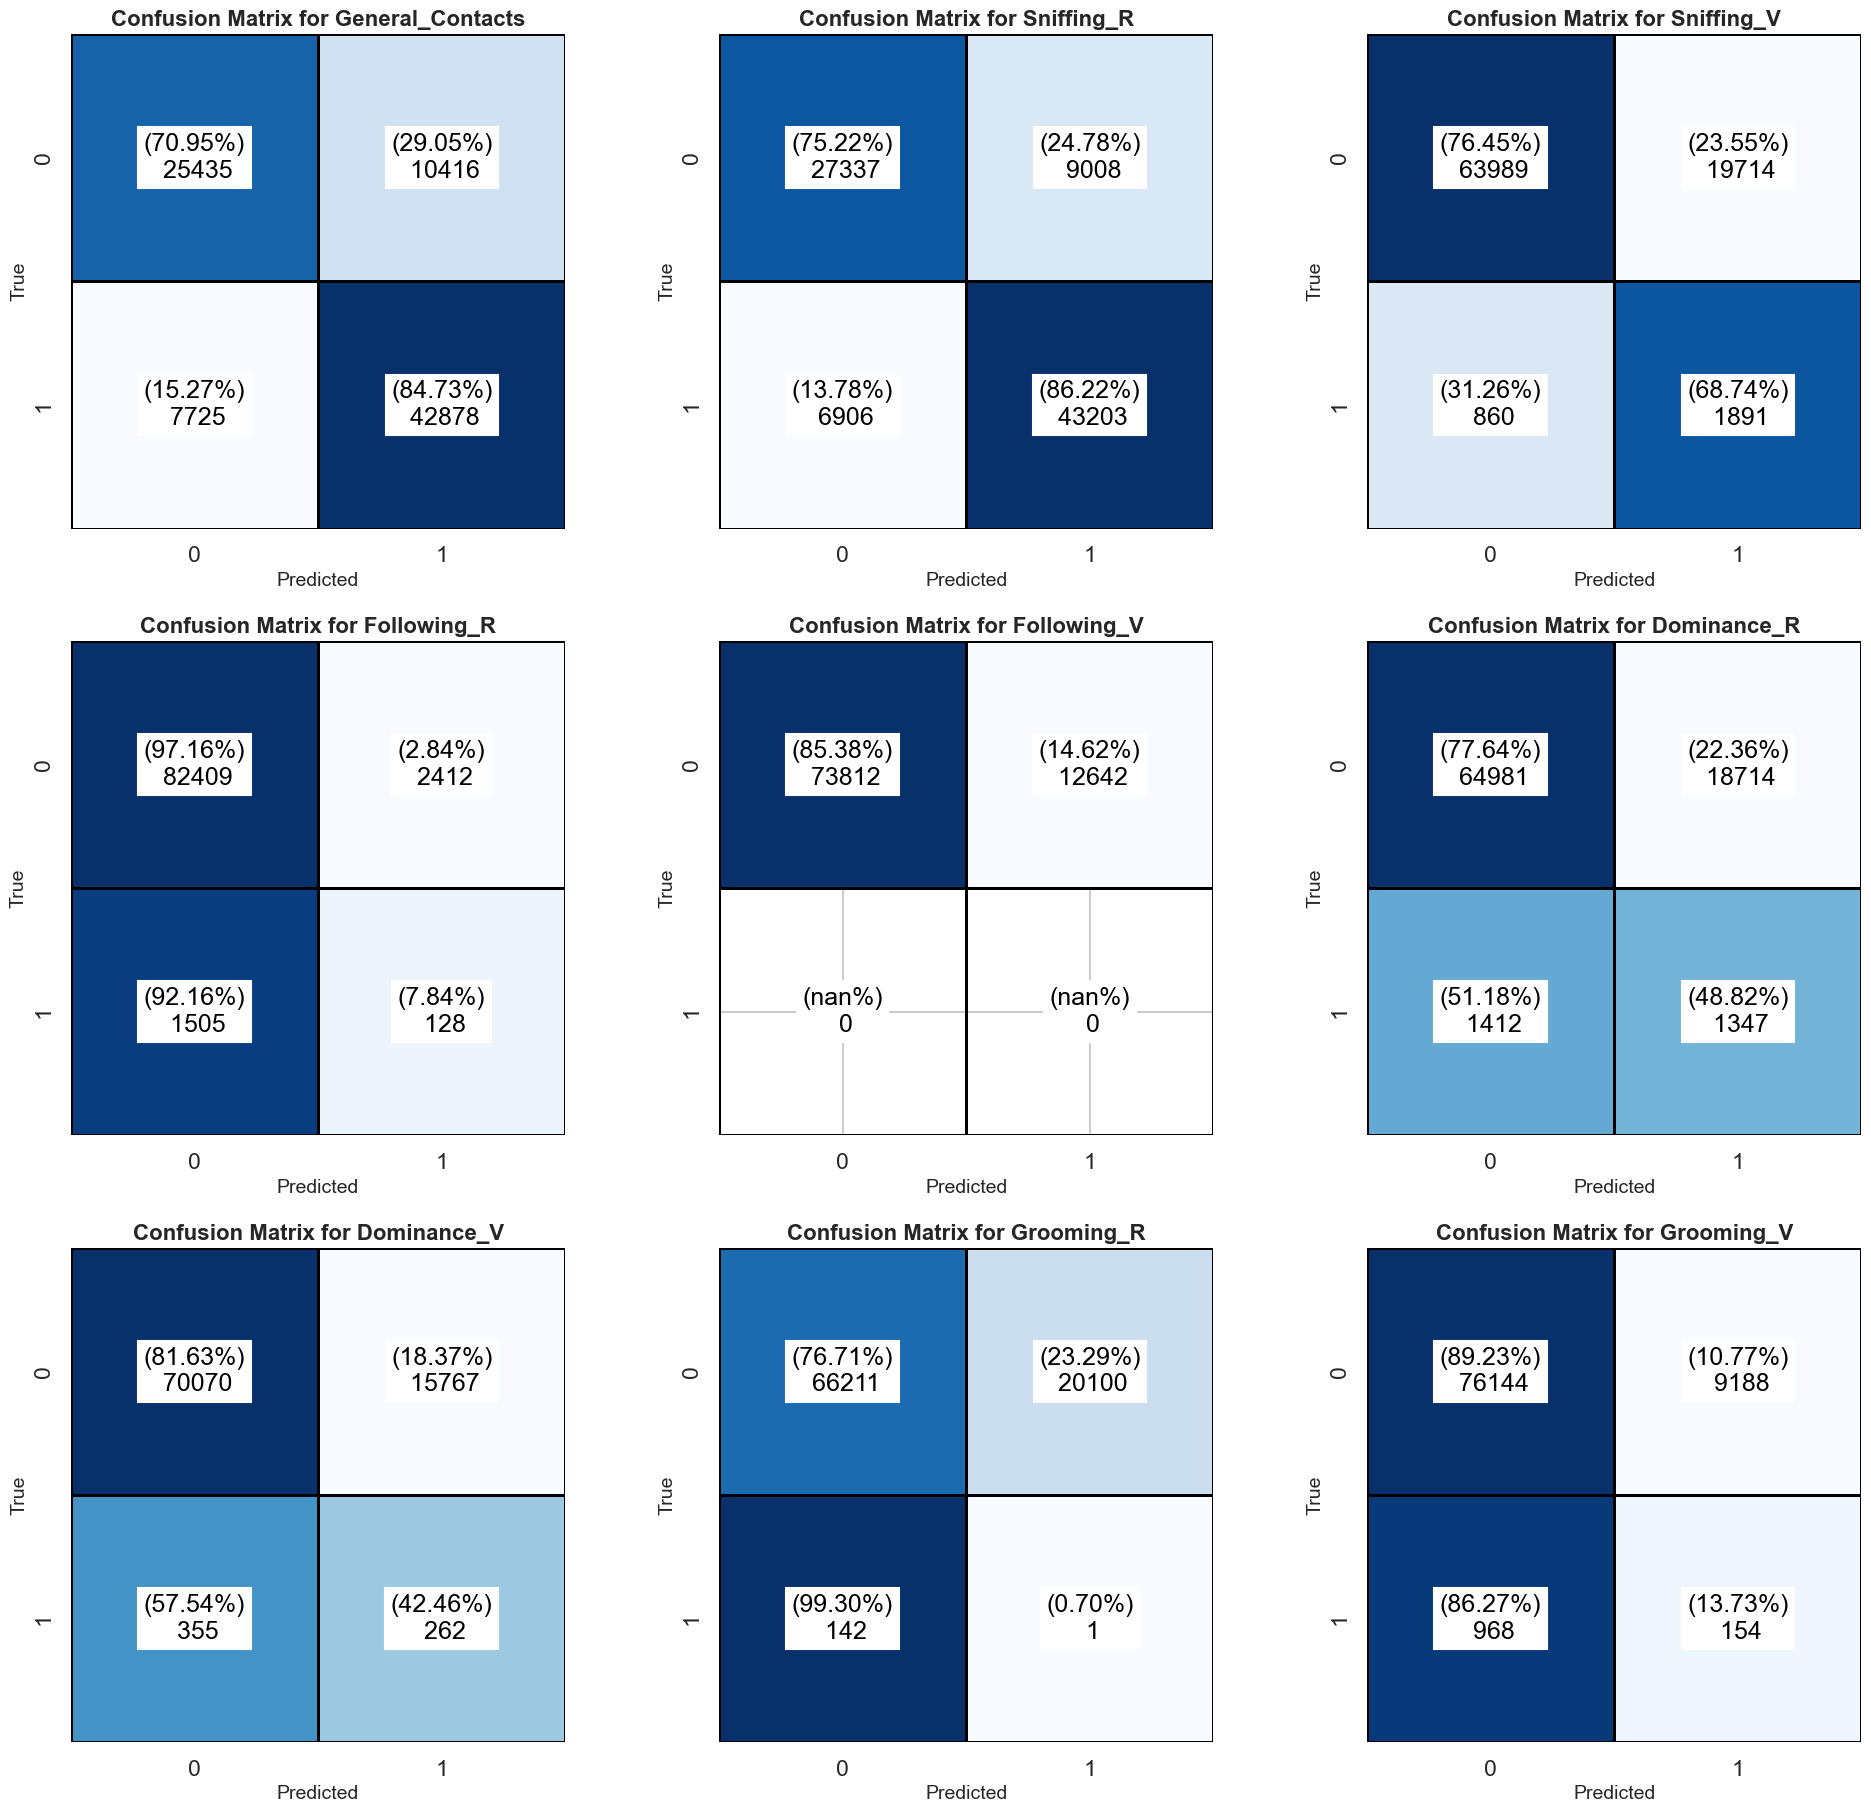

In [52]:
# Plot the confusion matrices
import seaborn as sns
import matplotlib.pyplot as plt


# Set the style and context for the plot
sns.set_theme(style="whitegrid", context="talk")

# Create the plot
plt.figure(figsize=(20, 30))
for i, col in enumerate(pred_df.columns[1:]):
    plt.subplot(5, 3, i+1)
    # Normalize the confusion matrix
    cm_normalized = cm[col] / cm[col].sum(axis=1)[:, np.newaxis]
    
    # Plot the number of TP, TN, FP, and FN
    sns.heatmap(cm_normalized, annot=False, fmt='d', cmap='Blues', cbar=False, square=True, linewidths=1, linecolor='black')#, annot_kws={"ha": 'center', "va": 'top'})
    
    # Plot the percentage
    #sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=False, square=True, linewidths=1, linecolor='black', annot_kws={"ha": 'center', "va": 'bottom'}, alpha=0.5)
    for (j, i), label in np.ndenumerate(cm_normalized):
        plt.text(i+0.5, j+0.5, f'({label:.2%})\n {cm[col][j, i]}', ha='center', va='center', color='black', backgroundcolor='white')
    plt.title(f'Confusion Matrix for {col}', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('True', fontsize=14)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


## Linear model

In [4]:
folder_gt_path = r'c:\Users\jalvarez\Documents\Data\DataSet_MDX52_INES\GT'
folder_pred_path = r'c:\Users\jalvarez\Documents\Data\DataSet_MDX52_INES\outputs_linears'

In [5]:
# Load the GT

files_gt = os.listdir(folder_gt_path)
files_gt = sorted(files_gt)
files_gt

['Test_1.csv',
 'Test_10.csv',
 'Test_11.csv',
 'Test_12.csv',
 'Test_13.csv',
 'Test_14.csv',
 'Test_15.csv',
 'Test_16.csv',
 'Test_2.csv',
 'Test_3.csv',
 'Test_4.csv',
 'Test_5.csv',
 'Test_6.csv',
 'Test_7.csv',
 'Test_8.csv',
 'Test_9.csv']

In [6]:

files_pred = os.listdir(folder_pred_path)
# Only the files with the extension .csv
files_pred = [file for file in files_pred if file.endswith('output.csv')]
files_pred = sorted(files_pred)
files_pred


['Test_10_output.csv',
 'Test_11_output.csv',
 'Test_12_output.csv',
 'Test_13_output.csv',
 'Test_14_output.csv',
 'Test_15_output.csv',
 'Test_16_output.csv',
 'Test_1_output.csv',
 'Test_2_output.csv',
 'Test_3_output.csv',
 'Test_4_output.csv',
 'Test_5_output.csv',
 'Test_6_output.csv',
 'Test_7_output.csv',
 'Test_8_output.csv',
 'Test_9_output.csv']

In [7]:
gt_df = pd.DataFrame()
pred_df = pd.DataFrame()

for file in files_gt:
    print(file)
    df_gt = pd.read_csv(os.path.join(folder_gt_path, file))
    # Discard the first 2 frames and last 2 frames
    #df_gt = df_gt.iloc[2:-2, :]
    gt_df = pd.concat([gt_df, df_gt])

    for file_pred in files_pred:

        if file.split('.')[0] == file_pred.split('_')[0] + '_' + file_pred.split('_')[1]:
            print(file_pred.split('_')[0] + '_' + file_pred.split('_')[1])
            df_pred = pd.read_csv(os.path.join(folder_pred_path, file_pred))
            # Discard the first 2 frames and last 2 frames
            # check if the length is the same
            if len(df_gt) != len(df_pred):
                print(f'Length of {file} is different from {file_pred}')
                break
            pred_df = pd.concat([pred_df, df_pred])
            

Test_1.csv
Test_1
Test_10.csv
Test_10
Test_11.csv
Test_11
Test_12.csv
Test_12
Test_13.csv
Test_13
Test_14.csv
Test_14
Test_15.csv
Test_15
Test_16.csv
Test_16
Test_2.csv
Test_2
Test_3.csv
Test_3
Test_4.csv
Test_4
Test_5.csv
Test_5
Test_6.csv
Test_6
Test_7.csv
Test_7
Test_8.csv
Test_8
Test_9.csv
Test_9


In [8]:
# Restore index
gt_df.reset_index(drop=True, inplace=True)
pred_df.reset_index(drop=True, inplace=True)

In [9]:
gt_df

,Frame,General_Contacts,Sniffing_R,Sniffing_head_R,Sniffing_body_R,Sniffing_anogenital_R,Following_R,Dominance_R,Rearing_R,Grooming_R,Sniffing_V,Sniffing_head_V,Sniffing_body_V,Sniffing_anogenital_V,Rearing_V,Grooming_V,Following_V,Dominance_V
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86513,5404,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86514,5405,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86515,5406,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86516,5407,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
pred_df

,Frame,General_Contacts,Sniffing_R,Sniffing_V,Sniffing_head_R,Sniffing_head_V,Sniffing_body_R,Sniffing_body_V,Sniffing_anal_R,Sniffing_anal_V,Following_R,Following_V,Dominance_R,Dominance_V,Grooming_R,Grooming_V
0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86513,5404,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
86514,5405,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
86515,5406,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
86516,5407,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [11]:
# Change name of columns in the prediction specificlly the Sniffing_anal_R and Sniffing_anal_V
pred_df.rename(columns={'Sniffing_anal_R': 'Sniffing_anogenital_R', 'Sniffing_anal_V': 'Sniffing_anogenital_V'}, inplace=True)

In [13]:
from sklearn.metrics import confusion_matrix

acc = dict()
cm = dict()
for col in pred_df.columns[1:]:
    acc[col] = np.mean(gt_df[col] == pred_df[col])
    cm[col] = confusion_matrix(gt_df[col], pred_df[col])

acc

{'General_Contacts': 0.798932014147345,
 'Sniffing_R': 0.8020874268938256,
 'Sniffing_V': 0.7591715018840011,
 'Sniffing_head_R': 0.7416260200189556,
 'Sniffing_head_V': 0.7977068355717886,
 'Sniffing_body_R': 0.627984927991863,
 'Sniffing_body_V': 0.802006518874685,
 'Sniffing_anogenital_R': 0.6866779167340901,
 'Sniffing_anogenital_V': 0.6495873691023833,
 'Following_R': 0.8569546221595506,
 'Following_V': 0.992706719988904,
 'Dominance_R': 0.8897570447768095,
 'Dominance_V': 0.7535772902748561,
 'Grooming_R': 0.9230680320858088,
 'Grooming_V': 0.8474537090547631}

In [14]:
cm

{'General_Contacts': array([[22476, 13429],
        [ 3967, 46646]], dtype=int64),
 'Sniffing_R': array([[27832,  8571],
        [ 8552, 41563]], dtype=int64),
 'Sniffing_V': array([[63673, 20094],
        [  742,  2009]], dtype=int64),
 'Sniffing_head_R': array([[60388, 20071],
        [ 2283,  3776]], dtype=int64),
 'Sniffing_head_V': array([[68363, 17053],
        [  449,   653]], dtype=int64),
 'Sniffing_body_R': array([[50082, 30101],
        [ 2085,  4250]], dtype=int64),
 'Sniffing_body_V': array([[69280, 17018],
        [  112,   108]], dtype=int64),
 'Sniffing_anogenital_R': array([[57647,  4937],
        [22171,  1763]], dtype=int64),
 'Sniffing_anogenital_V': array([[56146, 30276],
        [   41,    55]], dtype=int64),
 'Following_R': array([[73064, 11821],
        [  555,  1078]], dtype=int64),
 'Following_V': array([[85887,   631],
        [    0,     0]], dtype=int64),
 'Dominance_R': array([[76589,  7170],
        [ 2368,   391]], dtype=int64),
 'Dominance_V': array([[6

C:\Users\jalvarez\AppData\Local\Temp\ipykernel_17972\350553513.py:16: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm[col] / cm[col].sum(axis=1)[:, np.newaxis]


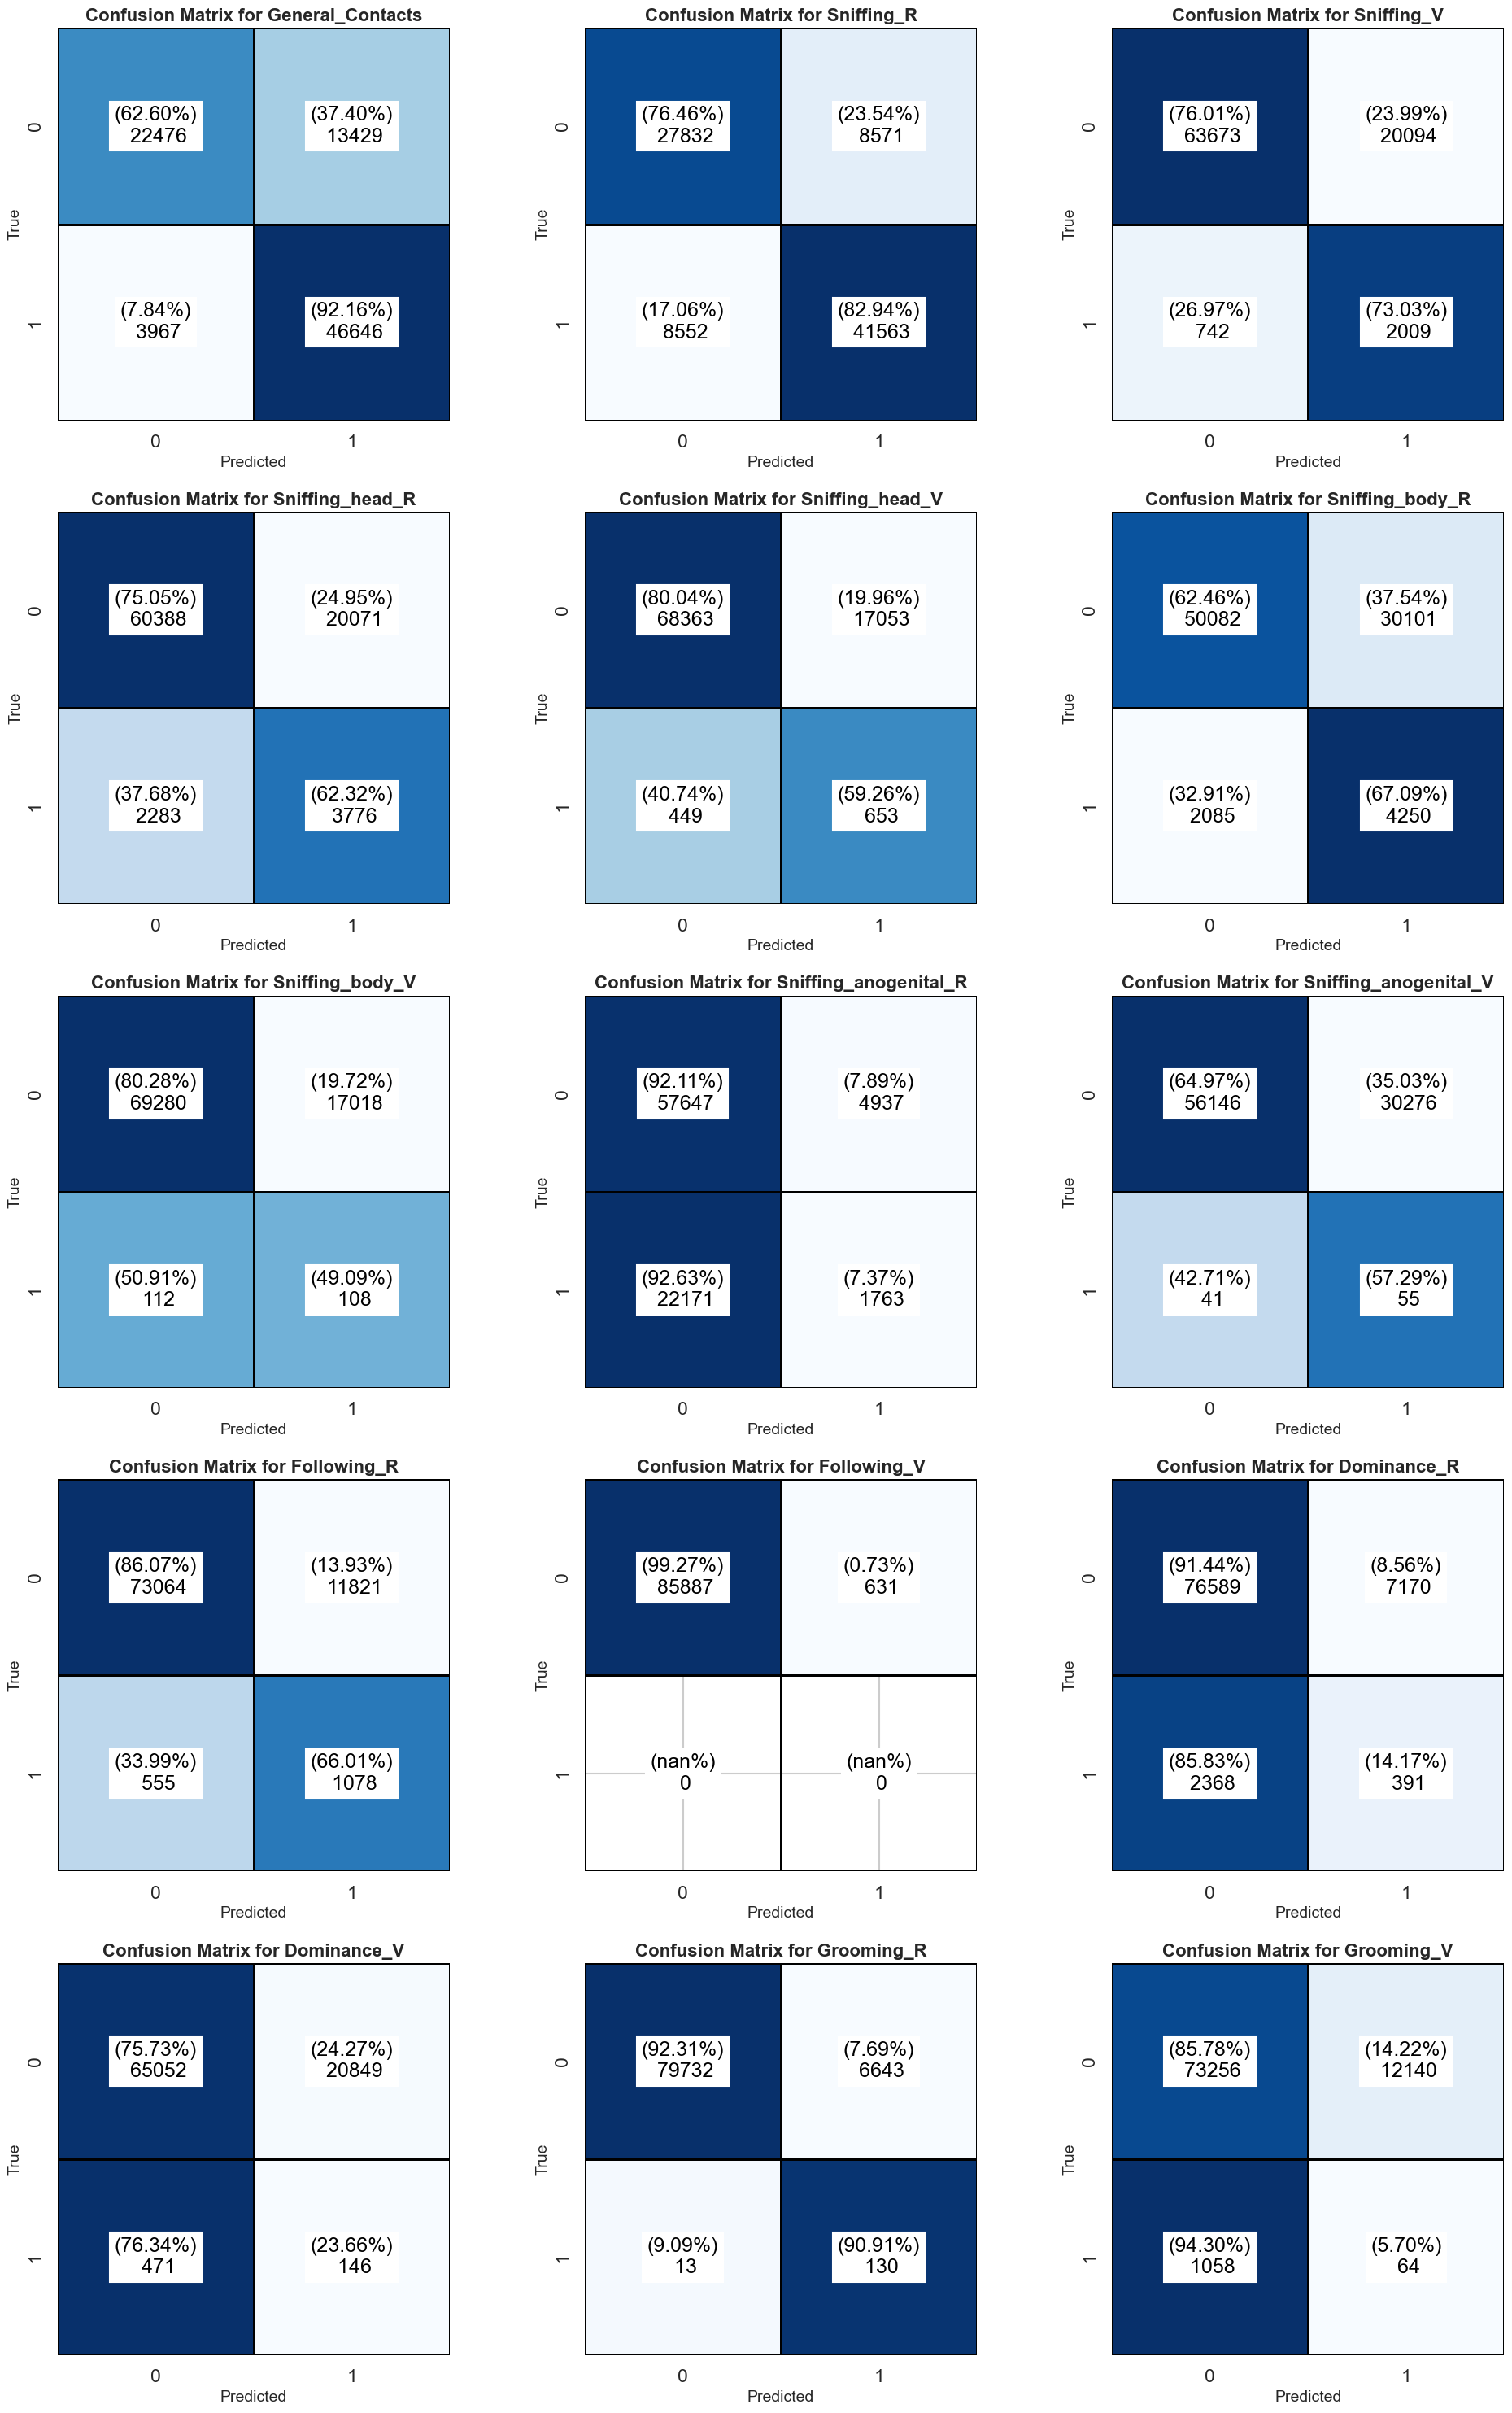

In [24]:
# Plot the confusion matrices
import seaborn as sns
import matplotlib.pyplot as plt


# Set the style and context for the plot
sns.set_theme(style="whitegrid", context="talk")


# Create the plot
plt.figure(figsize=(20, 30))

for i, col in enumerate(pred_df.columns[1:]):
    plt.subplot(5, 3, i+1)
    # Normalize the confusion matrix
    cm_normalized = cm[col] / cm[col].sum(axis=1)[:, np.newaxis]
    
    # Plot the number of TP, TN, FP, and FN
    sns.heatmap(cm_normalized, annot=False, fmt='d', cmap='Blues', cbar=False, square=True, linewidths=1, linecolor='black')#, annot_kws={"ha": 'center', "va": 'top'})
    
    # Plot the percentage
    #sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=False, square=True, linewidths=1, linecolor='black', annot_kws={"ha": 'center', "va": 'bottom'}, alpha=0.5)
    for (j, i), label in np.ndenumerate(cm_normalized):
        plt.text(i+0.5, j+0.5, f'({label:.2%})\n {cm[col][j, i]}', ha='center', va='center', color='black', backgroundcolor='white')
    plt.title(f'Confusion Matrix for {col}', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('True', fontsize=14)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Analysis per group 

In [52]:
folder_gt_path = r'c:\Users\jalvarez\Documents\Data\DataSet_MDX52_INES\GT'
folder_pred_path = r'c:\Users\jalvarez\Documents\Data\DataSet_MDX52_INES\outputs'


In [53]:

files_gt = os.listdir(folder_gt_path)
files_gt = sorted(files_gt)
files_gt


['Test_1.csv',
 'Test_10.csv',
 'Test_11.csv',
 'Test_12.csv',
 'Test_13.csv',
 'Test_14.csv',
 'Test_15.csv',
 'Test_16.csv',
 'Test_2.csv',
 'Test_3.csv',
 'Test_4.csv',
 'Test_5.csv',
 'Test_6.csv',
 'Test_7.csv',
 'Test_8.csv',
 'Test_9.csv']

In [56]:

files_pred = os.listdir(folder_pred_path)
# Only the files with the extension .csv
files_pred = [file for file in files_pred if file.endswith('output.csv')]
files_pred = sorted(files_pred)
files_pred

['Test_10_output.csv',
 'Test_11_output.csv',
 'Test_12_output.csv',
 'Test_13_output.csv',
 'Test_14_output.csv',
 'Test_15_output.csv',
 'Test_16_output.csv',
 'Test_1_output.csv',
 'Test_2_output.csv',
 'Test_3_output.csv',
 'Test_4_output.csv',
 'Test_5_output.csv',
 'Test_6_output.csv',
 'Test_7_output.csv',
 'Test_8_output.csv',
 'Test_9_output.csv']

In [57]:
gt_df = []
pred_df = []

for file in files_gt:
    print(file)
    gt_df.append(pd.read_csv(os.path.join(folder_gt_path, file)).iloc[2:-2, :])

    for file_pred in files_pred:

        if file.split('.')[0] == file_pred.split('_')[0] + '_' + file_pred.split('_')[1]:
            print(file_pred.split('_')[0] + '_' + file_pred.split('_')[1])

            pred_df.append(pd.read_csv(os.path.join(folder_pred_path, file_pred)))
            
            if len(gt_df[-1]) != len(pred_df[-1]):
                print(f'Length of {file} is different from {file_pred}')
                break

Test_1.csv
Test_1
Test_10.csv
Test_10
Test_11.csv
Test_11
Test_12.csv
Test_12
Test_13.csv
Test_13
Test_14.csv
Test_14
Test_15.csv
Test_15
Test_16.csv
Test_16
Test_2.csv
Test_2
Test_3.csv
Test_3
Test_4.csv
Test_4
Test_5.csv
Test_5
Test_6.csv
Test_6
Test_7.csv
Test_7
Test_8.csv
Test_8
Test_9.csv
Test_9


In [58]:
# Gropus of study
ME = ['Test_1', 'Test_2', 'Test_7', 'Test_8', 'Test_14']
WTE = ['Test_3', 'Test_9', 'Test_15', 'Test_16']
MNE = ['Test_4', 'Test_6', 'Test_10', 'Test_12']
WTNE = ['Test_5', 'Test_11', 'Test_13']



In [59]:
gt_df[0].columns[1:]

Index(['General_Contacts', 'Sniffing_R', 'Sniffing_head_R', 'Sniffing_body_R',
       'Sniffing_anogenital_R', 'Following_R', 'Dominance_R', 'Rearing_R',
       'Grooming_R', 'Sniffing_V', 'Sniffing_head_V', 'Sniffing_body_V',
       'Sniffing_anogenital_V', 'Rearing_V', 'Grooming_V', 'Following_V',
       'Dominance_V'],
      dtype='object')

In [60]:
pred_df[0].columns


Index(['Frame', 'General_Contacts', 'Sniffing_R', 'Sniffing_V', 'Following_R',
       'Following_V', 'Dominance_R', 'Dominance_V', 'Grooming_R',
       'Grooming_V'],
      dtype='object')

In [61]:
gt_df[0].columns[1:] 

Index(['General_Contacts', 'Sniffing_R', 'Sniffing_head_R', 'Sniffing_body_R',
       'Sniffing_anogenital_R', 'Following_R', 'Dominance_R', 'Rearing_R',
       'Grooming_R', 'Sniffing_V', 'Sniffing_head_V', 'Sniffing_body_V',
       'Sniffing_anogenital_V', 'Rearing_V', 'Grooming_V', 'Following_V',
       'Dominance_V'],
      dtype='object')

In [62]:
df_pred = pred_df[0].drop(columns=['Frame'])
columns_pred = pred_df[0].columns[1:]
df_gt = gt_df[0].drop(columns= gt_df[0].columns.difference(columns_pred))
# Order the columns
columns_ordered = df_gt.reindex(sorted(df_gt.columns), axis=1).columns

In [63]:
columns_ordered

Index(['Dominance_R', 'Dominance_V', 'Following_R', 'Following_V',
       'General_Contacts', 'Grooming_R', 'Grooming_V', 'Sniffing_R',
       'Sniffing_V'],
      dtype='object')

In [65]:
# For each video and each behavior, calculate the number of events
df_ME_gt = pd.DataFrame(columns= ['Video'] + list(columns_ordered))
df_WTE_gt = pd.DataFrame(columns= ['Video'] + list(columns_ordered))
df_MNE_gt = pd.DataFrame(columns= ['Video'] + list(columns_ordered))
df_WTNE_gt = pd.DataFrame(columns= ['Video'] + list(columns_ordered))

df_ME_pred = pd.DataFrame(columns= ['Video'] + list(columns_ordered))
df_WTE_pred = pd.DataFrame(columns= ['Video'] + list(columns_ordered))
df_MNE_pred = pd.DataFrame(columns= ['Video'] + list(columns_ordered))
df_WTNE_pred = pd.DataFrame(columns= ['Video'] + list(columns_ordered))

for i in range(len(gt_df)):
    # Get the name of the video
    video = files_gt[i].split('.')[0]
    print(video)
    # Get the df
    df_pred = pred_df[i].drop(columns=['Frame'])
    columns_pred = pred_df[i].columns[1:]
    df_gt = gt_df[i].drop(columns= gt_df[i].columns.difference(columns_pred))
    # Order the columns
    df_gt = df_gt.reindex(sorted(df_gt.columns), axis=1)
    df_pred = df_pred.reindex(sorted(df_pred.columns), axis=1)
    # Calculate the number of events per behavior
    num_gt = np.sum(df_gt, axis=0)
    num_pred = np.sum(df_pred, axis=0)
    
    if video in ME:
        df_ME_gt = pd.concat([df_ME_gt, pd.DataFrame([{'Video': video, **dict(num_gt)}])], ignore_index=True)
        df_ME_pred = pd.concat([df_ME_pred, pd.DataFrame([{'Video': video, **dict(num_pred)}])], ignore_index=True)
    elif video in WTE:
        df_WTE_gt = pd.concat([df_WTE_gt, pd.DataFrame([{'Video': video, **dict(num_gt)}])], ignore_index=True)
        df_WTE_pred = pd.concat([df_WTE_pred, pd.DataFrame([{'Video': video, **dict(num_pred)}])], ignore_index=True)
    elif video in MNE:
        df_MNE_gt = pd.concat([df_MNE_gt, pd.DataFrame([{'Video': video, **dict(num_gt)}])], ignore_index=True)
        df_MNE_pred = pd.concat([df_MNE_pred, pd.DataFrame([{'Video': video, **dict(num_pred)}])], ignore_index=True)
    elif video in WTNE:
        df_WTNE_gt = pd.concat([df_WTNE_gt, pd.DataFrame([{'Video': video, **dict(num_gt)}])], ignore_index=True)
        df_WTNE_pred = pd.concat([df_WTNE_pred, pd.DataFrame([{'Video': video, **dict(num_pred)}])], ignore_index=True)
    
    


    
    

Test_1
Test_10
Test_11
Test_12
Test_13
Test_14
Test_15
Test_16
Test_2
Test_3
Test_4
Test_5
Test_6
Test_7
Test_8


C:\Users\jalvarez\AppData\Local\Temp\ipykernel_16364\3816266679.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ME_gt = pd.concat([df_ME_gt, pd.DataFrame([{'Video': video, **dict(num_gt)}])], ignore_index=True)
C:\Users\jalvarez\AppData\Local\Temp\ipykernel_16364\3816266679.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ME_pred = pd.concat([df_ME_pred, pd.DataFrame([{'Video': video, **dict(num_pred)}])], ignore_index=True)
C:\Users\jalvarez\AppData\Local\Temp\ipykernel_16364\381

Test_9


In [66]:
df_ME_gt

,Video,Dominance_R,Dominance_V,Following_R,Following_V,General_Contacts,Grooming_R,Grooming_V,Sniffing_R,Sniffing_V
0,Test_1,267.0,0.0,175.0,0.0,3584.0,0.0,0.0,3521.0,151.0
1,Test_14,70.0,14.0,152.0,0.0,4473.0,0.0,0.0,4557.0,317.0
2,Test_2,38.0,39.0,121.0,0.0,2367.0,0.0,59.0,2272.0,206.0
3,Test_7,63.0,0.0,101.0,0.0,1949.0,0.0,0.0,1895.0,50.0
4,Test_8,246.0,63.0,55.0,0.0,3357.0,0.0,0.0,3326.0,170.0


In [67]:
df_ME_pred

,Video,Dominance_R,Dominance_V,Following_R,Following_V,General_Contacts,Grooming_R,Grooming_V,Sniffing_R,Sniffing_V
0,Test_1,1095.0,802.0,139.0,1002.0,3529.0,1141.0,419.0,3525.0,1368.0
1,Test_14,1200.0,1251.0,199.0,1237.0,4393.0,1257.0,375.0,4339.0,1487.0
2,Test_2,992.0,803.0,82.0,530.0,2759.0,1348.0,579.0,2735.0,1316.0
3,Test_7,554.0,628.0,172.0,938.0,2001.0,1426.0,688.0,1943.0,525.0
4,Test_8,1381.0,997.0,310.0,678.0,3363.0,1101.0,748.0,3357.0,1754.0


In [68]:
# For each behavior, calculate the mean and std of each group
ME_mean_gt = df_ME_gt.iloc[:, 1:].mean()
ME_std_gt = df_ME_gt.iloc[:, 1:].std()

ME_mean_pred = df_ME_pred.iloc[:, 1:].mean()
ME_std_pred = df_ME_pred.iloc[:, 1:].std()

WTE_mean_gt = df_WTE_gt.iloc[:, 1:].mean()
WTE_std_gt = df_WTE_gt.iloc[:, 1:].std()

WTE_mean_pred = df_WTE_pred.iloc[:, 1:].mean()
WTE_std_pred = df_WTE_pred.iloc[:, 1:].std()

MNE_mean_gt = df_MNE_gt.iloc[:, 1:].mean()
MNE_std_gt = df_MNE_gt.iloc[:, 1:].std()

MNE_mean_pred = df_MNE_pred.iloc[:, 1:].mean()
MNE_std_pred = df_MNE_pred.iloc[:, 1:].std()

WTNE_mean_gt = df_WTNE_gt.iloc[:, 1:].mean()
WTNE_std_gt = df_WTNE_gt.iloc[:, 1:].std()

WTNE_mean_pred = df_WTNE_pred.iloc[:, 1:].mean()
WTNE_std_pred = df_WTNE_pred.iloc[:, 1:].std()


In [69]:
ME_mean_gt

Dominance_R          136.8
Dominance_V           23.2
Following_R          120.8
Following_V            0.0
General_Contacts    3146.0
Grooming_R             0.0
Grooming_V            11.8
Sniffing_R          3114.2
Sniffing_V           178.8
dtype: float64

In [70]:
import seaborn as sns

In [71]:
df_ME_gt

,Video,Dominance_R,Dominance_V,Following_R,Following_V,General_Contacts,Grooming_R,Grooming_V,Sniffing_R,Sniffing_V
0,Test_1,267.0,0.0,175.0,0.0,3584.0,0.0,0.0,3521.0,151.0
1,Test_14,70.0,14.0,152.0,0.0,4473.0,0.0,0.0,4557.0,317.0
2,Test_2,38.0,39.0,121.0,0.0,2367.0,0.0,59.0,2272.0,206.0
3,Test_7,63.0,0.0,101.0,0.0,1949.0,0.0,0.0,1895.0,50.0
4,Test_8,246.0,63.0,55.0,0.0,3357.0,0.0,0.0,3326.0,170.0


C:\Users\jalvarez\AppData\Local\Temp\ipykernel_16364\1817977995.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ME_gt.iloc[:, idx_beh], ax=axs[0, 0], palette=palette)
C:\Users\jalvarez\AppData\Local\Temp\ipykernel_16364\1817977995.py:15: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.boxplot(data=df_ME_gt.iloc[:, idx_beh], ax=axs[0, 0], palette=palette)
C:\Users\jalvarez\AppData\Local\Temp\ipykernel_16364\1817977995.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_MNE_gt.iloc[:, idx_beh], ax=axs[0, 1], palette=palette)
C:\Users\jalvarez\AppData\Local\Temp\ipykernel_16364\1817977995.py:25: UserWarning: The palette

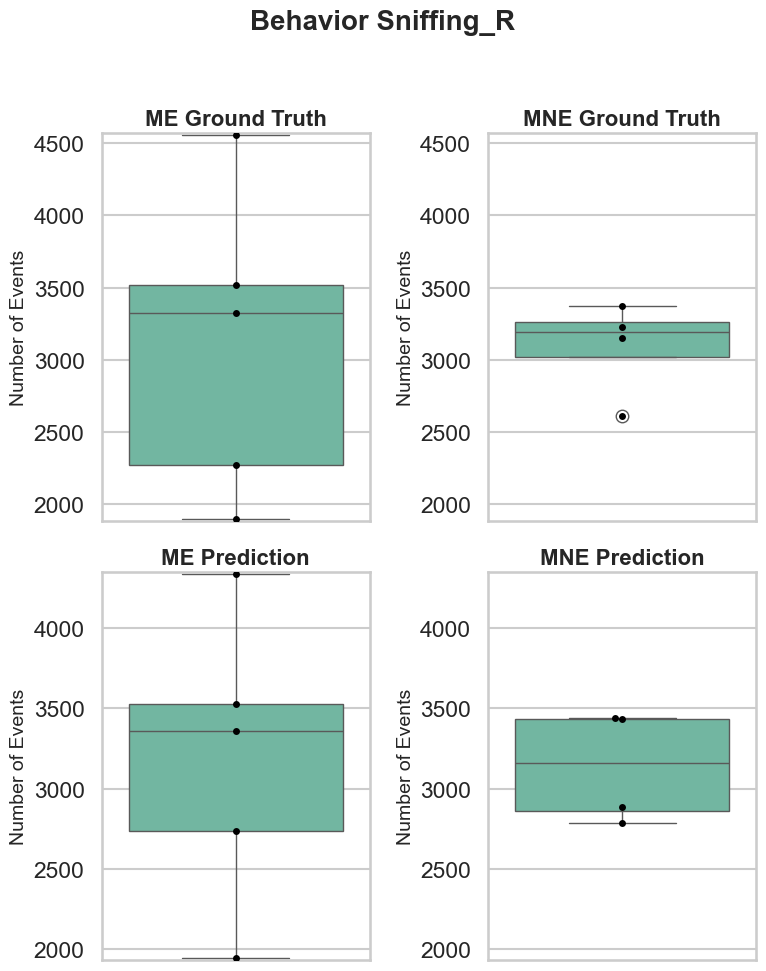

In [96]:
# Box plot of each behavior
idx_beh = 8 # General Contacts

# Set the style and context for the plot
sns.set_theme(style="whitegrid", context="talk")

# Create two boxplots next to each other
fig, axs = plt.subplots(2, 2, figsize=(8, 10))
fig.suptitle(f'Behavior {df_ME_gt.columns[idx_beh]}', fontsize=20, fontweight='bold')

# Define a color palette
palette = sns.color_palette("Set2")

# Boxplot for MEgt behavior 1
sns.boxplot(data=df_ME_gt.iloc[:, idx_beh], ax=axs[0, 0], palette=palette)
# Plot the points
sns.swarmplot(data=df_ME_gt.iloc[:, idx_beh], color='black', ax=axs[0, 0])
axs[0, 0].set_title('ME Ground Truth', fontsize=16, fontweight='bold')
axs[0, 0].set_ylabel('Number of Events', fontsize=14)
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylim(min(df_ME_gt.iloc[:, idx_beh].min(), df_MNE_gt.iloc[:, idx_beh].min()) - 10
                   , max(df_ME_gt.iloc[:, idx_beh].max(),df_MNE_gt.iloc[:, idx_beh].max()) + 10)

# Boxplot for MNEgt behavior 1
sns.boxplot(data=df_MNE_gt.iloc[:, idx_beh], ax=axs[0, 1], palette=palette)
# Plot the points
sns.swarmplot(data=df_MNE_gt.iloc[:, idx_beh], color='black', ax=axs[0, 1])
axs[0, 1].set_title('MNE Ground Truth', fontsize=16, fontweight='bold')
axs[0, 1].set_ylabel('Number of Events', fontsize=14)
axs[0, 1].set_xlabel('')
axs[0, 1].set_ylim(min(df_ME_gt.iloc[:, idx_beh].min(), df_MNE_gt.iloc[:, idx_beh].min()) - 10
    , max(df_MNE_gt.iloc[:, idx_beh].max(), df_ME_gt.iloc[:, idx_beh].max()) + 10)

# Boxplot for MEpred behavior 1
sns.boxplot(data=df_ME_pred.iloc[:, idx_beh], ax=axs[1, 0], palette=palette)
# Plot the points
sns.swarmplot(data=df_ME_pred.iloc[:, idx_beh], color='black', ax=axs[1, 0])
axs[1, 0].set_title('ME Prediction', fontsize=16, fontweight='bold')
axs[1, 0].set_ylabel('Number of Events', fontsize=14)
axs[1, 0].set_xlabel('')
axs[1, 0].set_ylim(min(df_ME_pred.iloc[:, idx_beh].min(), df_MNE_pred.iloc[:, idx_beh].min()) - 10
                   , max(df_ME_pred.iloc[:, idx_beh].max(), df_MNE_pred.iloc[:, idx_beh].max())+10)

# Boxplot for MNEpred behavior 1
sns.boxplot(data=df_MNE_pred.iloc[:, idx_beh], ax=axs[1, 1], palette=palette, label='Boxplot')
# Plot the points
sns.swarmplot(data=df_MNE_pred.iloc[:, idx_beh], color='black', ax=axs[1, 1], label='Individual Videos')
axs[1, 1].set_title('MNE Prediction', fontsize=16, fontweight='bold')
axs[1, 1].set_ylabel('Number of Events', fontsize=14)
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylim(min(df_ME_pred.iloc[:, idx_beh].min(), df_MNE_pred.iloc[:, idx_beh].min()) - 10
                , max(df_MNE_pred.iloc[:, idx_beh].max(), df_ME_pred.iloc[:, idx_beh].max())+10)
#plt.legend(fontsize=14)
# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()




C:\Users\jalvarez\AppData\Local\Temp\ipykernel_11920\805270161.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ME_gt.iloc[:, idx_beh], ax=axs[0, 0], palette=palette)
C:\Users\jalvarez\AppData\Local\Temp\ipykernel_11920\805270161.py:15: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.boxplot(data=df_ME_gt.iloc[:, idx_beh], ax=axs[0, 0], palette=palette)
C:\Users\jalvarez\AppData\Local\Temp\ipykernel_11920\805270161.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_MNE_gt.iloc[:, idx_beh], ax=axs[0, 1], palette=palette)
C:\Users\jalvarez\AppData\Local\Temp\ipykernel_11920\805270161.py:23: UserWarning: The palette lis

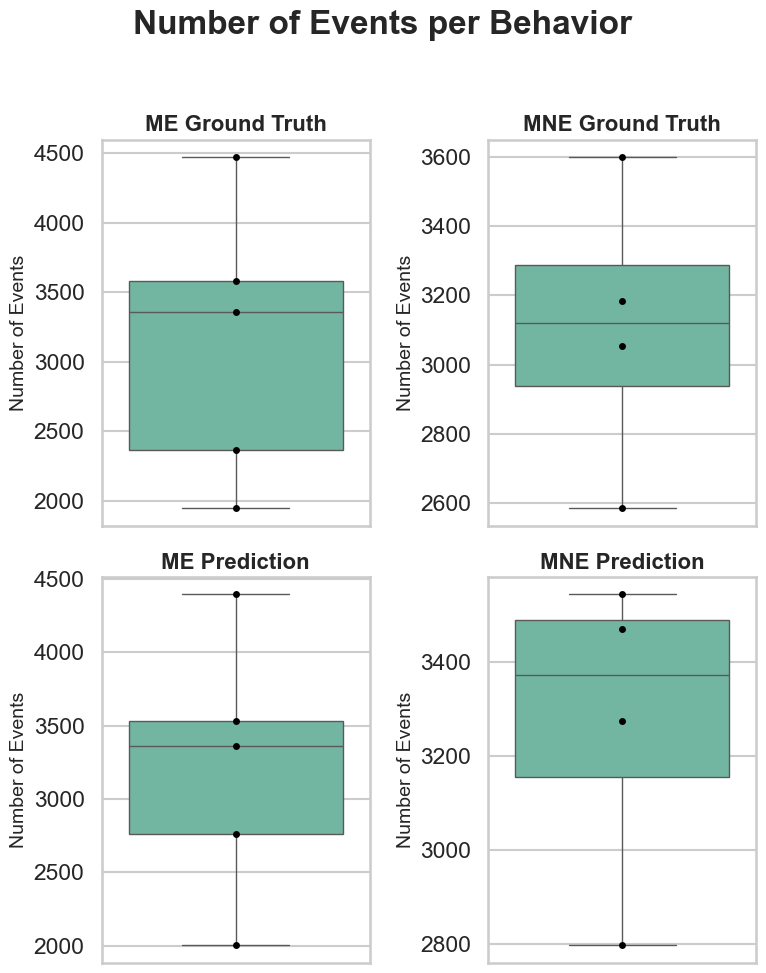

In [87]:
# Box plot of each behavior
idx_beh = 3

# Set the style and context for the plot
sns.set_theme(style="whitegrid", context="talk")

# Create two boxplots next to each other
fig, axs = plt.subplots(2, 2, figsize=(8, 10))
fig.suptitle('Number of Events per Behavior', fontsize=24, fontweight='bold')

# Define a color palette
palette = sns.color_palette("Set2")

# Boxplot for MEgt behavior 1
sns.boxplot(data=df_ME_gt.iloc[:, idx_beh], ax=axs[0, 0], palette=palette)
# Plot the points
sns.swarmplot(data=df_ME_gt.iloc[:, idx_beh], color='black', ax=axs[0, 0])
axs[0, 0].set_title('ME Ground Truth', fontsize=16, fontweight='bold')
axs[0, 0].set_ylabel('Number of Events', fontsize=14)
axs[0, 0].set_xlabel('')

# Boxplot for MNEgt behavior 1
sns.boxplot(data=df_MNE_gt.iloc[:, idx_beh], ax=axs[0, 1], palette=palette)
# Plot the points
sns.swarmplot(data=df_MNE_gt.iloc[:, idx_beh], color='black', ax=axs[0, 1])
axs[0, 1].set_title('MNE Ground Truth', fontsize=16, fontweight='bold')
axs[0, 1].set_ylabel('Number of Events', fontsize=14)
axs[0, 1].set_xlabel('')

# Boxplot for MEpred behavior 1
sns.boxplot(data=df_ME_pred.iloc[:, idx_beh], ax=axs[1, 0], palette=palette)
# Plot the points
sns.swarmplot(data=df_ME_pred.iloc[:, idx_beh], color='black', ax=axs[1, 0])
axs[1, 0].set_title('ME Prediction', fontsize=16, fontweight='bold')
axs[1, 0].set_ylabel('Number of Events', fontsize=14)
axs[1, 0].set_xlabel('')

# Boxplot for MNEpred behavior 1
sns.boxplot(data=df_MNE_pred.iloc[:, idx_beh], ax=axs[1, 1], palette=palette)
# Plot the points
sns.swarmplot(data=df_MNE_pred.iloc[:, idx_beh], color='black', ax=axs[1, 1])
axs[1, 1].set_title('MNE Prediction', fontsize=16, fontweight='bold')
axs[1, 1].set_ylabel('Number of Events', fontsize=14)
axs[1, 1].set_xlabel('')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


C:\Users\jalvarez\AppData\Local\Temp\ipykernel_11920\64065105.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ME_gt.iloc[:, idx_beh], ax=axs[0, 0], palette=palette)
C:\Users\jalvarez\AppData\Local\Temp\ipykernel_11920\64065105.py:15: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.boxplot(data=df_ME_gt.iloc[:, idx_beh], ax=axs[0, 0], palette=palette)
C:\Users\jalvarez\AppData\Local\Temp\ipykernel_11920\64065105.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_MNE_gt.iloc[:, idx_beh], ax=axs[0, 1], palette=palette)
C:\Users\jalvarez\AppData\Local\Temp\ipykernel_11920\64065105.py:23: UserWarning: The palette list ha

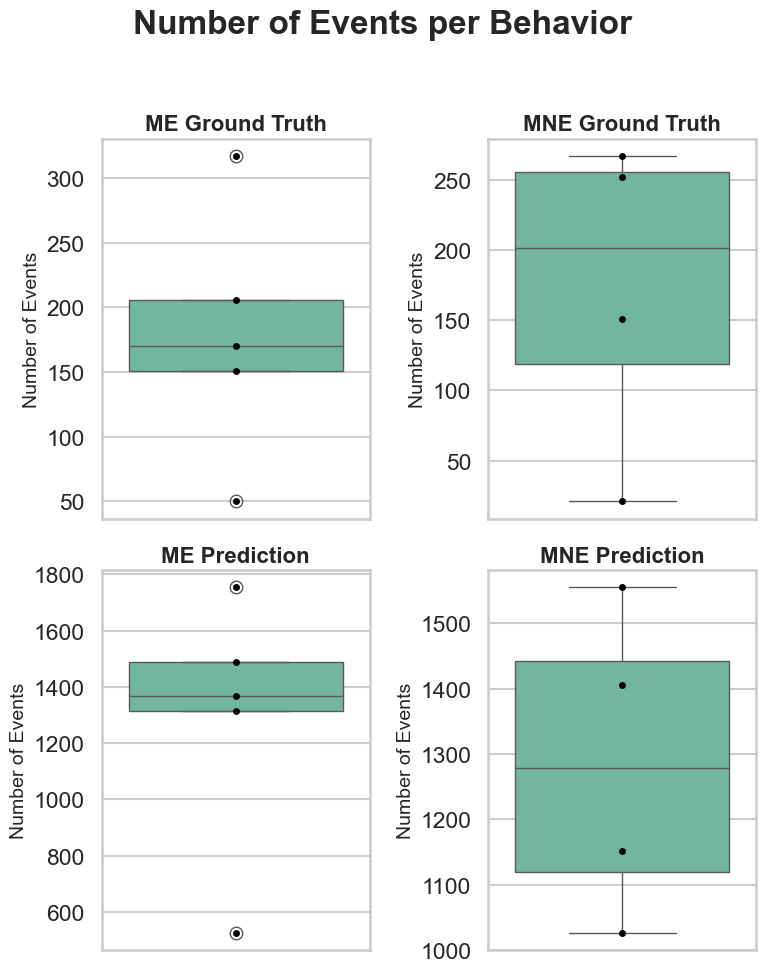

In [91]:
# Box plot of each behavior
idx_beh = 7

# Set the style and context for the plot
sns.set_theme(style="whitegrid", context="talk")

# Create two boxplots next to each other
fig, axs = plt.subplots(2, 2, figsize=(8, 10))
fig.suptitle('Number of Events per Behavior', fontsize=24, fontweight='bold')

# Define a color palette
palette = sns.color_palette("Set2")

# Boxplot for MEgt behavior 1
sns.boxplot(data=df_ME_gt.iloc[:, idx_beh], ax=axs[0, 0], palette=palette)
# Plot the points
sns.swarmplot(data=df_ME_gt.iloc[:, idx_beh], color='black', ax=axs[0, 0])
axs[0, 0].set_title('ME Ground Truth', fontsize=16, fontweight='bold')
axs[0, 0].set_ylabel('Number of Events', fontsize=14)
axs[0, 0].set_xlabel('')

# Boxplot for MNEgt behavior 1
sns.boxplot(data=df_MNE_gt.iloc[:, idx_beh], ax=axs[0, 1], palette=palette)
# Plot the points
sns.swarmplot(data=df_MNE_gt.iloc[:, idx_beh], color='black', ax=axs[0, 1])
axs[0, 1].set_title('MNE Ground Truth', fontsize=16, fontweight='bold')
axs[0, 1].set_ylabel('Number of Events', fontsize=14)
axs[0, 1].set_xlabel('')

# Boxplot for MEpred behavior 1
sns.boxplot(data=df_ME_pred.iloc[:, idx_beh], ax=axs[1, 0], palette=palette)
# Plot the points
sns.swarmplot(data=df_ME_pred.iloc[:, idx_beh], color='black', ax=axs[1, 0])
axs[1, 0].set_title('ME Prediction', fontsize=16, fontweight='bold')
axs[1, 0].set_ylabel('Number of Events', fontsize=14)
axs[1, 0].set_xlabel('')

# Boxplot for MNEpred behavior 1
sns.boxplot(data=df_MNE_pred.iloc[:, idx_beh], ax=axs[1, 1], palette=palette)
# Plot the points
sns.swarmplot(data=df_MNE_pred.iloc[:, idx_beh], color='black', ax=axs[1, 1])
axs[1, 1].set_title('MNE Prediction', fontsize=16, fontweight='bold')
axs[1, 1].set_ylabel('Number of Events', fontsize=14)
axs[1, 1].set_xlabel('')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()